In [2]:
import pandas as pd
Aliexpress_df = pd.read_csv('C:/Users/buw-ki/PycharmProjects/Python_Datascientist/AliExpress_Reviews_54280.csv' )

In [3]:
Wish_df = pd.read_csv('C:/Users/buw-ki/PycharmProjects/Python_Datascientist/Wish_Reviews_100000_.csv' )

In [4]:
Wish_df.isna().sum()

UserId                      0
UserName                    6
ReviewCount                 0
Relative Time               0
ReviewDate                  0
ReviewRating                0
ReviewTitle                 7
ReviewText              17438
ReviewCountry               6
ReviewExperienceDate        0
ReplyText                   0
ReplyTime               83427
dtype: int64

In [5]:
Aliexpress_df.head(5)

,Consumer Name,Review Count,Relative Time,Absolute Time,Rating,Title,Review,Appearance Date,Company Reply
0,oussama,19reviews,2 hours ago,2025-06-17T17:53:21.000Z,5,Outstanding Customer Support - Refund Issue Fu...,I recently had an issue involving a refund fro...,TN,No reply
1,Chris D,2reviews,3 hours ago,2025-06-17T17:11:53.000Z,1,I have not received the full refund…,I have not received the full refund from AliEx...,GB,No reply
2,PH,1review,3 hours ago,2025-06-17T17:07:18.000Z,1,Wrong item and dispute handling,BEWARE! The seller sent an incompatible produc...,FI,No reply
3,Matt Collins,17reviews,4 hours ago,2025-06-17T16:39:24.000Z,1,Sent illegal,"Sent illegal, counterfeit goods nothing like t...",GB,No reply
4,Mas Bejo Angkringan Bayat,1review,4 hours ago,2025-06-17T16:35:48.000Z,3,fast in shipping,"fast in shipping, i like",ID,No reply


In [6]:
Wish_df.head(5)

,UserId,UserName,ReviewCount,Relative Time,ReviewDate,ReviewRating,ReviewTitle,ReviewText,ReviewCountry,ReviewExperienceDate,ReplyText,ReplyTime
0,6859807b2f2478915d28fdb6,Brent Hall,1,A day ago,2025-06-23T18:27:57.000Z,4,I've had good experiences here,I've had good experiences here. No complaints ...,CA,"June 23, 2025",No reply,NaN
1,685612ddf0e9f31ca77ac12d,Jesse Williams,1,4 days ago,2025-06-21T04:03:27.000Z,3,Wrong color it was supposed to been…,Wrong color it was supposed to been black and ...,US,"June 20, 2025",No reply,NaN
2,68560fbe2f2478501c2618b7,Priscilla Ann Thompson,1,4 days ago,2025-06-21T03:50:07.000Z,5,I love it so much,I love it so much,US,"June 20, 2025",No reply,NaN
3,685609298a537563fd756bbf,Warren Panem,1,4 days ago,2025-06-21T03:22:15.000Z,5,Craft supplies with great selection for a lot ...,"I can get items, the same items as other compa...",US,"June 20, 2025",No reply,NaN
4,68546fbc4e662d048747bd43,Gordon Taylor,1,5 days ago,2025-06-19T22:19:23.000Z,5,Lots of great things. Good prices love browsing.,"Lots of good products, easy to navigate . terr...",AU,"April 25, 2025",No reply,NaN


In [7]:
Wish_df.isna().sum()

UserId                      0
UserName                    6
ReviewCount                 0
Relative Time               0
ReviewDate                  0
ReviewRating                0
ReviewTitle                 7
ReviewText              17438
ReviewCountry               6
ReviewExperienceDate        0
ReplyText                   0
ReplyTime               83427
dtype: int64

Missing Value Analysis
Here's the missing data summary:

UserName: 6 missing

ReviewTitle: 7 missing

ReviewText: 17,438 missing (this is extremely high - needs investigation)

ReviewCountry: 6 missing

ReplyTime: 83,427 missing (majority of records)

In [12]:
#1. Handling Missing UserNames (6 records)
Wish_df['UserName'] = Wish_df.apply(
    lambda x: f"Anonymous_{x['UserId']}" if pd.isna(x['UserName']) else x['UserName'],
    axis=1
)
Wish_df.isna().sum()

UserId                      0
UserName                    0
ReviewCount                 0
Relative Time               0
ReviewDate                  0
ReviewRating                0
ReviewTitle                 7
ReviewText              17438
ReviewCountry               6
ReviewExperienceDate        0
ReplyText                   0
ReplyTime               83427
dtype: int64

In [14]:
#2. Handling Missing ReviewTitles (7 records)
# Extract first 50 chars from ReviewText as title when missing
def generate_title(row):
    if pd.isna(row['ReviewTitle']) and pd.notna(row['ReviewText']):
        return row['ReviewText'][:50] + ('...' if len(row['ReviewText']) > 50 else '')
    return row['ReviewTitle']

Wish_df['ReviewTitle'] = Wish_df.apply(generate_title, axis=1)
Wish_df.isna().sum()

UserId                      0
UserName                    0
ReviewCount                 0
Relative Time               0
ReviewDate                  0
ReviewRating                0
ReviewTitle                 0
ReviewText              17438
ReviewCountry               6
ReviewExperienceDate        0
ReplyText                   0
ReplyTime               83427
dtype: int64

In [18]:
#3. Handling Missing ReviewText (17,438 records)
print(f"Percentage of missing ReviewText: {Wish_df['ReviewText'].isna().mean()*100:.2f}%")
# Display rows with ReviewTitle but empty ReviewText
empty_review_rows = Wish_df[Wish_df['ReviewText'].isna() & Wish_df['ReviewTitle'].notna()]
columns_to_display = ['UserId', 'UserName', 'ReviewTitle', 'ReviewText', 'ReviewRating', 'ReviewDate']
print(empty_review_rows[columns_to_display].head(10))
#Wish_df.isna().sum()

Percentage of missing ReviewText: 17.51%


,UserId,UserName,ReviewTitle,ReviewText,ReviewRating,ReviewDate
13,684a0fd2f0e9f30f186d6da5,John Price,Best shopping Network around,NaN,5,2025-06-12T01:23:12.000Z
16,684758ed8a537541e064ce7d,Jennifer McColl,Fast and easy and good prices,NaN,5,2025-06-09T23:58:21.000Z
20,684173602824b55ee5041669,amanda strange,Quality stuff,NaN,5,2025-06-05T12:37:50.000Z
26,5b98219d4de5666d34738b25,Elizabeth,Great place to shop,NaN,5,2025-05-30T19:23:38.000Z
34,5bf59d265483f4b8a9a3f15b,Darren Mahoney,EXCELLENT APP,NaN,5,2025-05-17T00:16:14.000Z
52,5cf8cb7e99e21889f9d02e5a,Peter Kalliakoudis,Great package.,NaN,5,2025-04-23T11:40:08.000Z
66,67f31c0705c9020762611abd,Janet Johnson,Nice products great prices,NaN,5,2025-04-07T02:28:01.000Z
71,67eafd5a25760188a5929121,Donald Hayden,It it gets my order on time every time,NaN,5,2025-03-31T22:39:00.000Z
73,67e6495e74626a6f484dd602,Sheila Millay,Love the items,NaN,5,2025-03-28T09:02:11.000Z
79,67dc1f1daa12980ef3e904c2,William Madumetja,Quality products,NaN,5,2025-03-20T15:59:37.000Z


Percentage distribution of ReviewRatings for empty ReviewText:
 Rating  Count  Percentage
      1    277         1.6
      2    113         0.6
      3    437         2.5
      4   2172        12.5
      5  14439        82.8


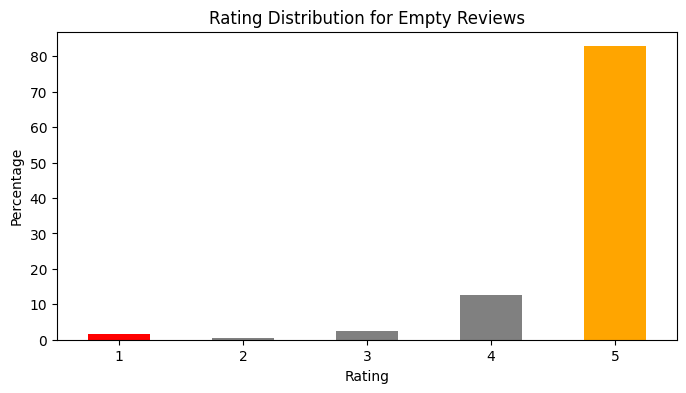

In [23]:
#3. Handling Missing ReviewText (17,438 records)
# Calculate percentage distribution of ReviewRating for empty ReviewText rows
# First ensure we have empty review rows
empty_review_rows = Wish_df[Wish_df['ReviewText'].isna()]

if not empty_review_rows.empty:
    # Calculate percentage distribution
    rating_counts = empty_review_rows['ReviewRating'].value_counts()
    total = rating_counts.sum()
    
    # Create percentage distribution
    rating_distribution = pd.DataFrame({
        'Rating': rating_counts.index,
        'Count': rating_counts.values,
        'Percentage': (rating_counts.values / total * 100).round(1)
    }).sort_values('Rating')
    
    print("Percentage distribution of ReviewRatings for empty ReviewText:")
    print(rating_distribution.to_string(index=False))
    
    # Visualization
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(8, 4))
    rating_distribution.set_index('Rating')['Percentage'].plot(
        kind='bar',
        title='Rating Distribution for Empty Reviews',
        ylabel='Percentage',
        xlabel='Rating',
        color=['red' if x == 1 else 'orange' if x == 5 else 'gray' for x in rating_distribution['Rating']]
    )
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No empty reviews found in the dataset.")

In [30]:
#3. Handling Missing ReviewText (17,438 records)
# Fill with combined metadata
Wish_df['ReviewText'] = Wish_df.apply(
    lambda x: f"Rating: {x['ReviewRating']}. {x['ReviewTitle']}" 
              if pd.isna(x['ReviewText']) 
              else x['ReviewText'],
    axis=1
)
Wish_df.isna().sum()

UserId                      0
UserName                    0
ReviewCount                 0
Relative Time               0
ReviewDate                  0
ReviewRating                0
ReviewTitle                 0
ReviewText                  0
ReviewCountry               6
ReviewExperienceDate        0
ReplyText                   0
ReplyTime               83427
dtype: int64

In [31]:
#4. Handling Missing ReviewCountry (6 records)
# Fill with mode (most common country)
mode_country = Wish_df['ReviewCountry'].mode()[0]
Wish_df['ReviewCountry'] = Wish_df['ReviewCountry'].fillna(mode_country)
Wish_df.isna().sum()

UserId                      0
UserName                    0
ReviewCount                 0
Relative Time               0
ReviewDate                  0
ReviewRating                0
ReviewTitle                 0
ReviewText                  0
ReviewCountry               0
ReviewExperienceDate        0
ReplyText                   0
ReplyTime               83427
dtype: int64

In [31]:
5. Handling Missing ReplyTime (83,427 records)
# Fill with mode (most common country)
mode_country = Wish_df['ReviewCountry'].mode()[0]
Wish_df['ReviewCountry'] = Wish_df['ReviewCountry'].fillna(mode_country)
Wish_df.isna().sum()

UserId                      0
UserName                    0
ReviewCount                 0
Relative Time               0
ReviewDate                  0
ReviewRating                0
ReviewTitle                 0
ReviewText                  0
ReviewCountry               0
ReviewExperienceDate        0
ReplyText                   0
ReplyTime               83427
dtype: int64

In [36]:
#5. Handling Missing ReplyTime (83,427 records)
missing_reply_time = Wish_df['ReplyTime'].isna().sum()
total_rows = len(Wish_df)
print(f"Missing ReplyTime: {missing_reply_time} rows ({missing_reply_time/total_rows:.1%})")
print(Wish_df.groupby(Wish_df['ReplyTime'].isna())['ReviewRating'].mean())
# If >70% missing, the column may be unreliable for analysis.
Wish_df.drop(columns=['ReplyTime'], inplace=True)
Wish_df.isna().sum()

Missing ReplyTime: 83427 rows (83.8%)
ReplyTime
False    4.341062
True     4.059633
Name: ReviewRating, dtype: float64


UserId                  0
UserName                0
ReviewCount             0
Relative Time           0
ReviewDate              0
ReviewRating            0
ReviewTitle             0
ReviewText              0
ReviewCountry           0
ReviewExperienceDate    0
ReplyText               0
dtype: int64

In [37]:
# Ensure proper data types
Wish_df['ReviewDate'] = pd.to_datetime(Wish_df['ReviewDate'])
Wish_df['ReviewRating'] = pd.to_numeric(Wish_df['ReviewRating'], errors='coerce')
Wish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99600 entries, 0 to 99599
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   UserId                99600 non-null  object             
 1   UserName              99600 non-null  object             
 2   ReviewCount           99600 non-null  int64              
 3   Relative Time         99600 non-null  object             
 4   ReviewDate            99600 non-null  datetime64[ns, UTC]
 5   ReviewRating          99600 non-null  int64              
 6   ReviewTitle           99600 non-null  object             
 7   ReviewText            99600 non-null  object             
 8   ReviewCountry         99600 non-null  object             
 9   ReviewExperienceDate  99600 non-null  object             
 10  ReplyText             99600 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 8.4+ M

In [38]:
# Clean text fields
text_cols = ['UserName', 'ReviewTitle', 'ReviewText', 'ReplyText']
for col in text_cols:
    Wish_df[col] = Wish_df[col].astype(str).str.strip()
    Wish_df[col] = Wish_df[col].replace({'nan': '', 'None': ''})
Wish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99600 entries, 0 to 99599
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   UserId                99600 non-null  object             
 1   UserName              99600 non-null  object             
 2   ReviewCount           99600 non-null  int64              
 3   Relative Time         99600 non-null  object             
 4   ReviewDate            99600 non-null  datetime64[ns, UTC]
 5   ReviewRating          99600 non-null  int64              
 6   ReviewTitle           99600 non-null  object             
 7   ReviewText            99600 non-null  object             
 8   ReviewCountry         99600 non-null  object             
 9   ReviewExperienceDate  99600 non-null  object             
 10  ReplyText             99600 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 8.4+ M

In [39]:
Wish_df.head()

,UserId,UserName,ReviewCount,Relative Time,ReviewDate,ReviewRating,ReviewTitle,ReviewText,ReviewCountry,ReviewExperienceDate,ReplyText
0,6859807b2f2478915d28fdb6,Brent Hall,1,A day ago,2025-06-23 18:27:57+00:00,4,I've had good experiences here,I've had good experiences here. No complaints ...,CA,"June 23, 2025",No reply
1,685612ddf0e9f31ca77ac12d,Jesse Williams,1,4 days ago,2025-06-21 04:03:27+00:00,3,Wrong color it was supposed to been…,Wrong color it was supposed to been black and ...,US,"June 20, 2025",No reply
2,68560fbe2f2478501c2618b7,Priscilla Ann Thompson,1,4 days ago,2025-06-21 03:50:07+00:00,5,I love it so much,I love it so much,US,"June 20, 2025",No reply
3,685609298a537563fd756bbf,Warren Panem,1,4 days ago,2025-06-21 03:22:15+00:00,5,Craft supplies with great selection for a lot ...,"I can get items, the same items as other compa...",US,"June 20, 2025",No reply
4,68546fbc4e662d048747bd43,Gordon Taylor,1,5 days ago,2025-06-19 22:19:23+00:00,5,Lots of great things. Good prices love browsing.,"Lots of good products, easy to navigate . terr...",AU,"April 25, 2025",No reply


In [40]:
# Standardize ReviewExperienceDate
Wish_df['ReviewExperienceDate'] = pd.to_datetime(Wish_df['ReviewExperienceDate'])

In [41]:
Wish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99600 entries, 0 to 99599
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   UserId                99600 non-null  object             
 1   UserName              99600 non-null  object             
 2   ReviewCount           99600 non-null  int64              
 3   Relative Time         99600 non-null  object             
 4   ReviewDate            99600 non-null  datetime64[ns, UTC]
 5   ReviewRating          99600 non-null  int64              
 6   ReviewTitle           99600 non-null  object             
 7   ReviewText            99600 non-null  object             
 8   ReviewCountry         99600 non-null  object             
 9   ReviewExperienceDate  99600 non-null  datetime64[ns]     
 10  ReplyText             99600 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(2), object(7)
m

In [42]:
# Clean text fields
text_cols = ['ReviewTitle', 'ReviewText', 'ReplyText']
for col in text_cols:
    Wish_df[col] = Wish_df[col].str.replace(r'[^\w\s.,!?]', '', regex=True)  # Remove special chars
    Wish_df[col] = Wish_df[col].str.strip()  # Remove leading/trailing whitespace
    Wish_df[col] = Wish_df[col].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces

In [43]:
# Ensure ratings are numeric and within 1-5
Wish_df['ReviewRating'] = pd.to_numeric(Wish_df['ReviewRating'], errors='coerce')
Wish_df['ReviewRating'] = Wish_df['ReviewRating'].clip(1, 5)
    

In [44]:
# Clean country codes
Wish_df['ReviewCountry'] = Wish_df['ReviewCountry'].str.upper().str.strip()

In [48]:
from datetime import datetime, timedelta
import re
import numpy as np
def parse_relative_time(relative_str):
    if pd.isna(relative_str):
        return np.nan
    
    relative_str = relative_str.lower()
    
    # Handle cases like "Updated 2 days ago"
    if 'updated' in relative_str:
        relative_str = relative_str.replace('updated', '').strip()
    
    # Parse time units
    if 'minute' in relative_str:
        num = int(re.search(r'\d+', relative_str).group())
        return timedelta(minutes=num)
    elif 'hour' in relative_str:
        num = int(re.search(r'\d+', relative_str).group())
        return timedelta(hours=num)
    elif 'day' in relative_str:
        num = 1 if 'a day' in relative_str else int(re.search(r'\d+', relative_str).group())
        return timedelta(days=num)
    else:
        return np.nan
# Parse relative time
Wish_df['TimeSinceReview'] = Wish_df['Relative Time'].apply(parse_relative_time)

In [49]:
# Create review length feature
Wish_df['ReviewLength'] = Wish_df['ReviewText'].str.len()
Wish_df.head()

,UserId,UserName,ReviewCount,Relative Time,ReviewDate,ReviewRating,ReviewTitle,ReviewText,ReviewCountry,ReviewExperienceDate,ReplyText,TimeSinceReview,ReviewLength
0,6859807b2f2478915d28fdb6,Brent Hall,1,A day ago,2025-06-23 18:27:57+00:00,4,Ive had good experiences here,Ive had good experiences here. No complaints o...,CA,2025-06-23,No reply,1 days,191
1,685612ddf0e9f31ca77ac12d,Jesse Williams,1,4 days ago,2025-06-21 04:03:27+00:00,3,Wrong color it was supposed to been,Wrong color it was supposed to been black and ...,US,2025-06-20,No reply,4 days,70
2,68560fbe2f2478501c2618b7,Priscilla Ann Thompson,1,4 days ago,2025-06-21 03:50:07+00:00,5,I love it so much,I love it so much,US,2025-06-20,No reply,4 days,17
3,685609298a537563fd756bbf,Warren Panem,1,4 days ago,2025-06-21 03:22:15+00:00,5,Craft supplies with great selection for a lot ...,"I can get items, the same items as other compa...",US,2025-06-20,No reply,4 days,105
4,68546fbc4e662d048747bd43,Gordon Taylor,1,5 days ago,2025-06-19 22:19:23+00:00,5,Lots of great things. Good prices love browsing.,"Lots of good products, easy to navigate . terr...",AU,2025-04-25,No reply,5 days,137


In [54]:
## Check for duplicate reviews
duplicate_mask = Wish_df.duplicated(subset=['UserId', 'ReviewDate', 'ReviewText'], keep='first')
print(f"Found {duplicate_mask.sum()} duplicates")
# Wish_df[duplicate_mask]
Wish_df = Wish_df[~duplicate_mask].copy()
duplicate_mask = Wish_df.duplicated(subset=['UserId', 'ReviewDate', 'ReviewText'], keep='first')
print(f"Found {duplicate_mask.sum()} duplicates")

Found 12 duplicates
Found 0 duplicates


In [53]:
Wish_df[duplicate_mask]

,UserId,UserName,ReviewCount,Relative Time,ReviewDate,ReviewRating,ReviewTitle,ReviewText,ReviewCountry,ReviewExperienceDate,ReplyText,TimeSinceReview,ReviewLength
61580,5d513ee20663764c72b0864d,Mark Hutchinson,2,"Aug 15, 2020",2020-08-15 16:28:33+00:00,1,dont waste your money its coating,dont waste your money its coating came of and ...,GB,2020-08-15,No reply,NaT,128
66640,5b2dea264de5666d3447a5eb,Mr Price,11,"Jul 7, 2020",2020-07-07 18:50:21+00:00,1,Not happy,Not happy with what Ive been sent instead of a...,GB,2020-07-07,No reply,NaT,116
71800,5ecb1986c66da3d45a8d0c27,Brad Colalillo,1,"May 25, 2020",2020-05-25 01:04:19+00:00,5,Cheap an awesome quick deals all day,Cheap an awesome quick deals all day long,CA,2020-05-25,No reply,NaT,41
81460,5e39a53585d0285ad9003ee0,Dusty Blesse,1,"Feb 4, 2020",2020-02-04 17:09:27+00:00,5,I think its better then the other sets,I think its better then the other sets But som...,CA,2020-02-04,No reply,NaT,139
82600,5cf679aa400f6fdd142825ea,Roberta Jones,2,"Feb 1, 2020",2020-02-01 14:10:29+00:00,5,Good quality stuff and at a good price,Rating 5. Good quality stuff and at a good price,US,2020-02-01,No reply,NaT,48
86960,5e2afdcdddcefa2a545e03af,allwin allu,1,"Jan 24, 2020",2020-01-24 14:24:06+00:00,5,Good work,Good work. Keep it up,IN,2020-01-24,No reply,NaT,21
87900,5e29b148616781169986fb8e,Ghanou benhatri,1,"Jan 23, 2020",2020-01-23 14:44:30+00:00,4,Wish is lovely place to shop .,Wish is lovely place to shop .Happy with the s...,GB,2020-01-23,No reply,NaT,79
87960,5e299e7ffe898929e8217287,Dhmhtrhs Hawk,1,"Jan 23, 2020",2020-01-23 13:24:22+00:00,5,Perfect customer service,Perfect customer service anything i need solve...,GR,2020-01-23,No reply,NaT,71
88600,5e28a97fd1e2f9ddad9ae90e,Pat Thompson,2,"Jan 22, 2020",2020-01-22 19:59:06+00:00,5,I have been ordrting from Wish at least,I have been ordrting from Wish at least 4 yrs ...,US,2020-01-22,No reply,NaT,85
89140,5e27f59a616781d44b85d629,Moegammed Suliman,1,"Jan 22, 2020",2020-01-22 07:11:47+00:00,5,Wish is very affordable,Wish is very affordable. I love this app,ZA,2020-01-22,No reply,NaT,40


In [55]:
Wish_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99588 entries, 0 to 99599
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   UserId                99588 non-null  object             
 1   UserName              99588 non-null  object             
 2   ReviewCount           99588 non-null  int64              
 3   Relative Time         99588 non-null  object             
 4   ReviewDate            99588 non-null  datetime64[ns, UTC]
 5   ReviewRating          99588 non-null  int64              
 6   ReviewTitle           99588 non-null  object             
 7   ReviewText            99588 non-null  object             
 8   ReviewCountry         99588 non-null  object             
 9   ReviewExperienceDate  99588 non-null  datetime64[ns]     
 10  ReplyText             99588 non-null  object             
 11  TimeSinceReview       7 non-null      timedelta64[ns]    
 12  ReviewLen

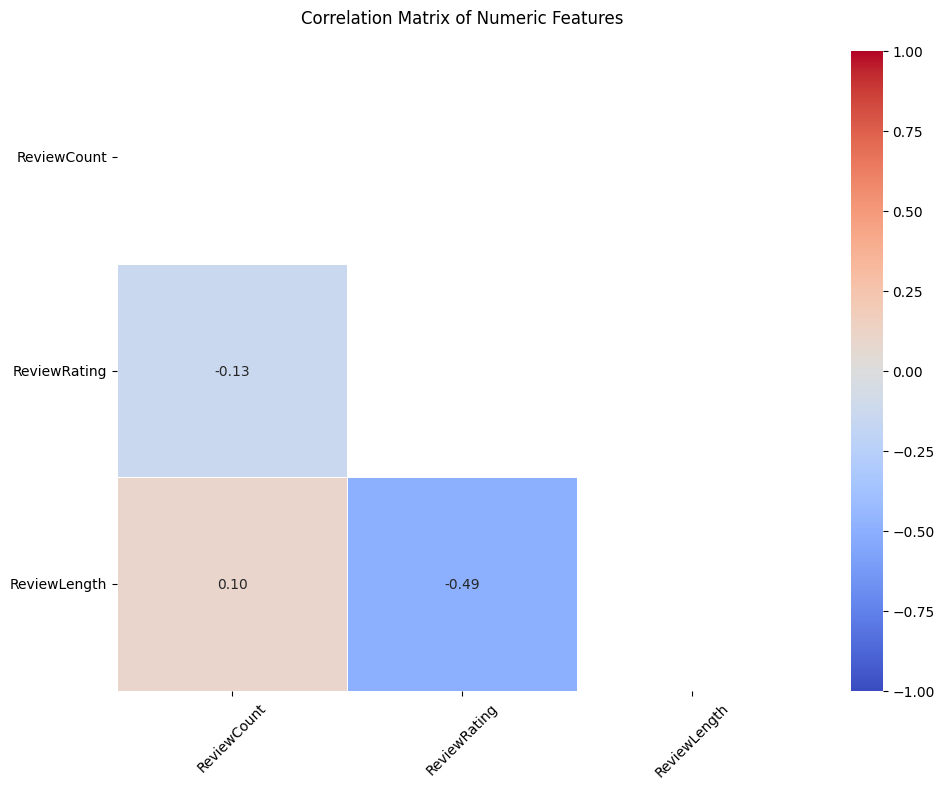

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Select and prepare numeric features
numeric_cols = Wish_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'ReviewRating' not in numeric_cols:
    numeric_cols.append('ReviewRating')  # Ensure target is included

# 2. Create correlation matrix
corr_matrix = Wish_df[numeric_cols].corr()

# 3. Plot heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            center=0,
            vmin=-1, 
            vmax=1,
            linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

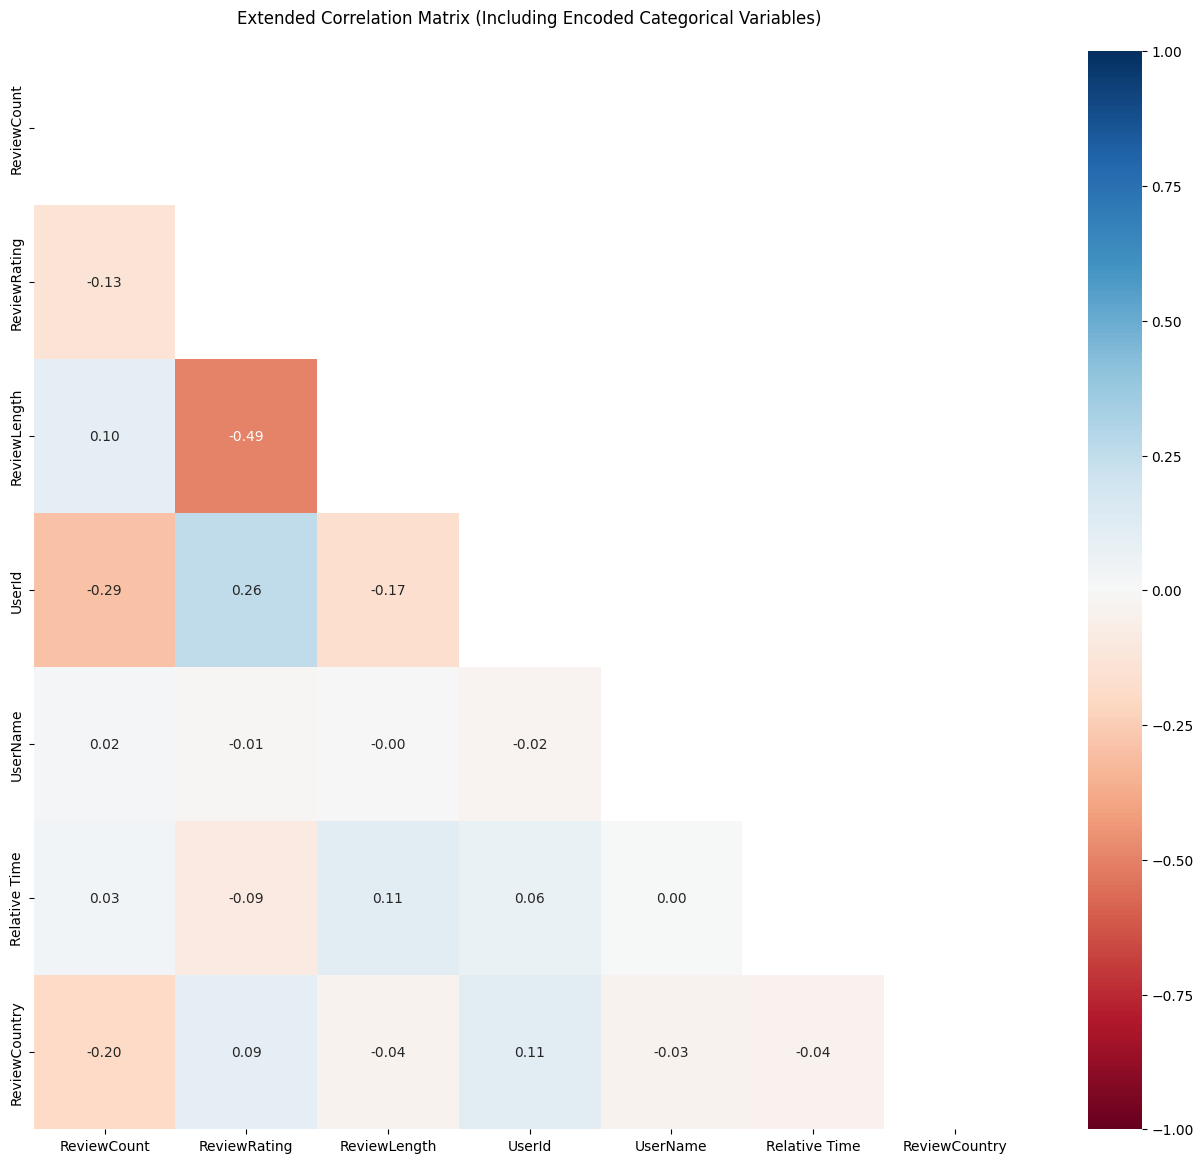

In [62]:
# 1. Encode categorical variables temporarily
from sklearn.preprocessing import LabelEncoder

# Select categorical columns (excluding text)
cat_cols = Wish_df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['ReviewTitle', 'ReviewText', 'ReplyText']]

# Create temporary encoded dataframe
temp_df = Wish_df[numeric_cols].copy()
for col in cat_cols:
    le = LabelEncoder()
    temp_df[col] = le.fit_transform(Wish_df[col].astype(str))

# 2. Plot expanded correlation
plt.figure(figsize=(16, 14))
corr = temp_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='RdBu',
            center=0,
            vmin=-1, 
            vmax=1)
plt.title("Extended Correlation Matrix (Including Encoded Categorical Variables)", pad=20)
plt.show()

The correlation of -0.49 between ReviewLength and ReviewRating reveals a moderately strong negative relationship—meaning shorter reviews tend to have higher ratings (and vice versa)

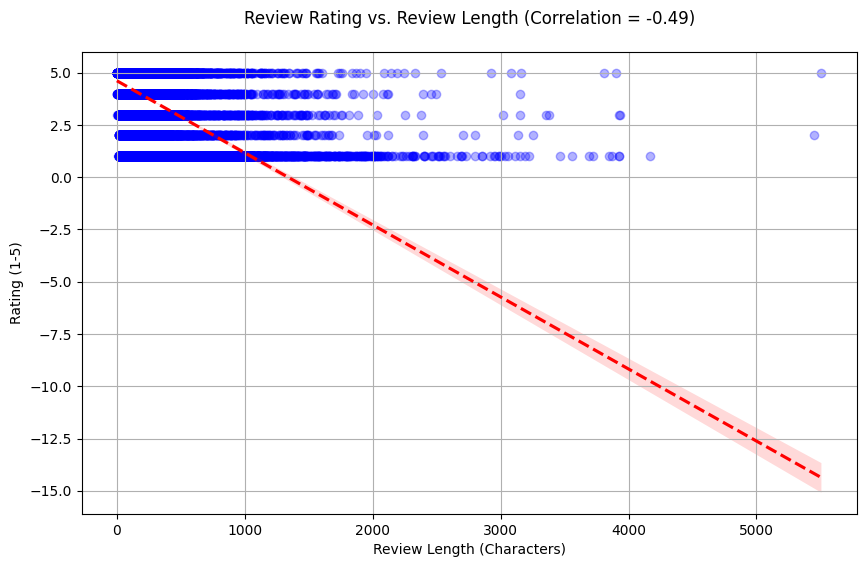

In [63]:
# 1. Visualize the Relationship
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(
    data=Wish_df,
    x='ReviewLength',
    y='ReviewRating',
    scatter_kws={'alpha': 0.3, 'color': 'blue'},
    line_kws={'color': 'red', 'linestyle': '--'}
)
plt.title("Review Rating vs. Review Length (Correlation = -0.49)", pad=20)
plt.xlabel("Review Length (Characters)")
plt.ylabel("Rating (1-5)")
plt.grid(True)
plt.show()

In [64]:
# Statistical Validation
from scipy.stats import pearsonr

corr, p_value = pearsonr(Wish_df['ReviewLength'], Wish_df['ReviewRating'])
print(f"Pearson r: {corr:.2f}, p-value: {p_value:.4f}")

Pearson r: -0.49, p-value: 0.0000


A p-value = 0.00  < 0.05 confirms the correlation is statistically significant

In [65]:
#1. Data Preparation
#Target Variable
Wish_df['Satisfied'] = Wish_df['ReviewRating'].apply(lambda x: 1 if x >= 4 else 0)

In [97]:
# Feature Engineering
# Temporal features
Wish_df['ReviewDate'] = Wish_df['ReviewDate'].dt.tz_convert('UTC')
Wish_df['DaysSinceReview'] = (pd.Timestamp.now().tz_localize('UTC') - Wish_df['ReviewDate']).dt.days
Wish_df['ReviewMonth'] = Wish_df['ReviewDate'].dt.month

# Text-based features
Wish_df['TitleLength'] = Wish_df['ReviewTitle'].str.len()
Wish_df['TextLength'] = Wish_df['ReviewText'].str.len()
Wish_df['HasReply'] = Wish_df['ReplyText'].apply(lambda x: 0 if x == 'No reply' else 1)

# User behavior
Wish_df['ReviewFrequency'] = Wish_df.groupby('UserId')['UserId'].transform('count')
#print(pd.Timestamp.now().tz_localize('UTC') - Wish_df['ReviewDate'])
#print(Wish_df['ReviewFrequency'])

0        1
1        1
2        1
3        1
4        1
        ..
99595    1
99596    1
99597    1
99598    1
99599    1
Name: ReviewFrequency, Length: 99588, dtype: int64


In [99]:
# 2. Text Processing Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Text preprocessing
text_preprocessor = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        ngram_range=(1, 2),
        min_df=5
    ))
])

# Column transformer
preprocessor = ColumnTransformer([
    ('text_title', text_preprocessor, 'ReviewTitle'),
    ('text_body', text_preprocessor, 'ReviewText'),
    ('numeric', 'passthrough', ['ReviewCount', 'DaysSinceReview', 'ReviewLength'])
])

In [103]:
#3. Model Building
#Option 1: For Rating Prediction (Regression)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = Wish_df[['ReviewTitle', 'ReviewText', 'ReviewCount', 'DaysSinceReview', 'ReviewLength']]
y = Wish_df['ReviewRating']
#Wish_df.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100))
])

#model.fit(X_train, y_train)

In [ ]:
# Option 2: For Satisfaction Classification
from sklearn.ensemble import RandomForestClassifier

X = df[['ReviewTitle', 'ReviewText', 'ReviewCount', 'DaysSinceReview', 'ReviewLength']]
y = df['Satisfied']  # Binary target

model_2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

model_2.fit(X_train, y_train)

In [ ]:
# 4. Evaluation Metrics
from sklearn.metrics import mean_squared_error, classification_report

# For regression
y_pred = model.predict(X_test)
print("Model_1 --> RMSE:", mean_squared_error(y_test, y_pred, squared=False))

y_pred_2 = model_2.predict(X_test)
print("Model_2 --> RMSE:", mean_squared_error(y_test, y_pred_2, squared=False))

# For classification
print("### model _1 #######")
print(classification_report(y_test, y_pred))
print("### model _2 #######")
print(classification_report(y_test, y_pred_2))